# Exercise 2


Rebecca Ghidoni

ID:2026709
***

In [1]:
# Import libraries
library(repr) 
library(dplyr)
library(GoFKernel)
options(repr.plot.width=9, repr.plot.height=4)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: KernSmooth
KernSmooth 2.23 loaded
Copyright M. P. Wand 1997-2009


## Exercise 1

In [2]:
# Create data 
x <- c(15.58,15.9,16,16.1,16.2)
p1 <- c(0.15,0.21,0.35,0.15,0.14)
p2 <- c(0.14,0.05,0.64,0.08,0.09)


#Evaluate the expected values, E[X], and the variance, 
#Var(X), for both methods
E1 <- sum(x*p1)
var1 <- sum((x-E1)**2*p1)

E2 <- sum(x*p2)
var2 <- sum((x-E2)**2*p2)

cat("With p1: E[x]=", E1, "\tand Var(x)=", var1,'\n')
cat("With p2: E[x]=", E2, "\tand Var(x)=", var2)

With p1: E[x]= 15.959 	and Var(x)= 0.033979 
With p2: E[x]= 15.9622 	and Var(x)= 0.02816716

## Exercise 2

The probability that a person will wait for less than 10 minutes is:  28.34687 %

From simulation: 	E[x]= 23.56022 	var(x)= 363.2272 
From theory: 		E[x]= 30 	var(x)= 900 

The probability that a person will wait for more than 1 hour is:  13.53353 %

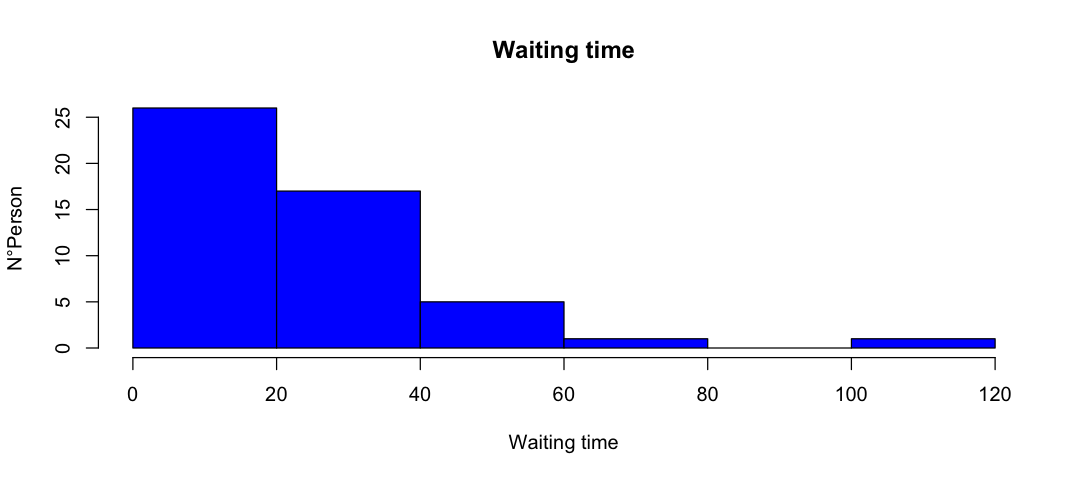

In [3]:
#Parameters
n = 1:50
l = 1/30


#A
x <- rexp(n, l)
hist(x, xlab='Waiting time', ylab='N°Person',
main = sprintf("Waiting time"), col="blue")


# B
cat("The probability that a person will wait for less than 10 minutes is: ", pexp(10,l)*100,"%\n\n")


# C
sim_exp <- mean(x) # Expected value for simulated data
sim_var <- sd(x)**2 # Variance for simulated data
th_exp <- 1/l # Theorical expected value
th_var <- 1/(l**2) # Theorical variance

cat("From simulation: \tE[x]=", sim_exp, "\tvar(x)=", sim_var,"\n")
cat("From theory: \t\tE[x]=", th_exp, "\tvar(x)=", th_var,"\n\n")


# D
cat("The probability that a person will wait for more than 1 hour is: ",(1-pexp(60,l))*100 ,'%')


## Exercise 3

The probability that there is at least one error on a specific page is: 28.34687 %



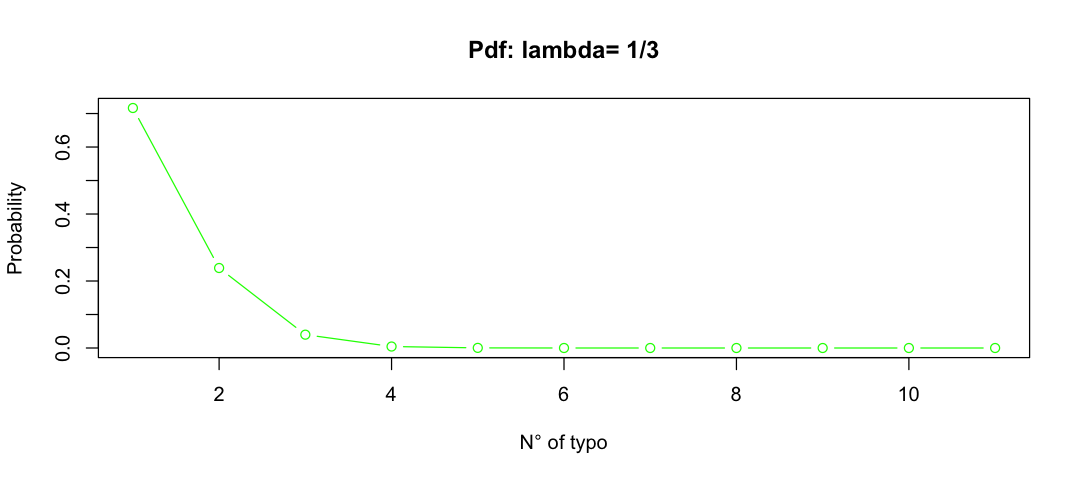

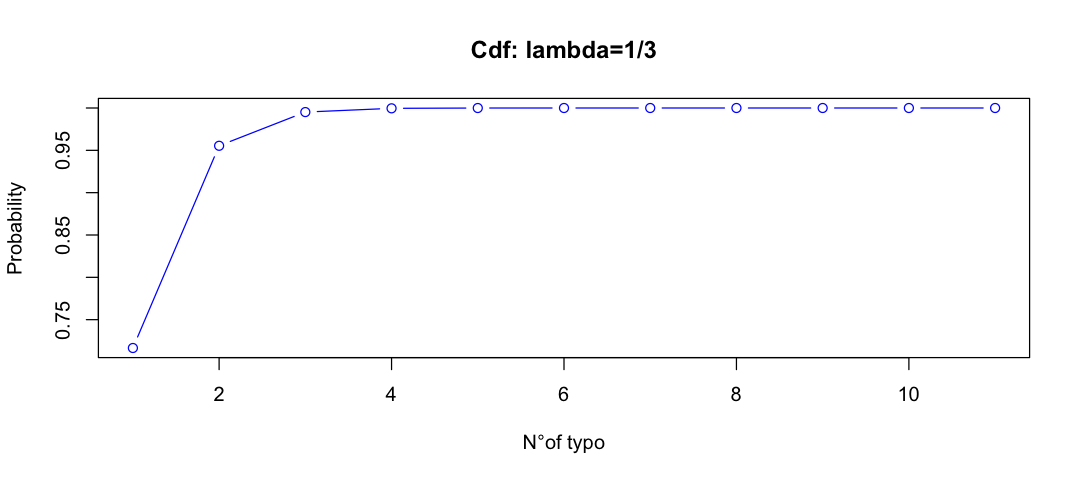

In [4]:
#Parameters
l <- 1/3
n <- 0:10

dpois <- dpois(n,l) 

plot(dpois, col='green', xlab='N° of typo', ylab='Probability', 
        main=sprintf("Pdf: lambda= 1/3"),type='b')


cat("The probability that there is at least one error on a specific page is:",(1-dpois[1])*100, '%')


ppois <- ppois(n,l) 
cat('\n\n')
plot(ppois, col='blue', xlab='N°of typo', ylab='Probability',
        main=sprintf("Cdf: lambda=1/3"),type='b')

## Exercise 4

In [5]:
#Parameters
n <- 52 #total cards
x <- 10 #extracted cards
a <- 4 #aces
p <- a/n #probability
f <- 0:x-1 #failure
s <- 1 #success

p_ace <- 1-sum(dnbinom(f,s,p)) # Probability distribution

cat("The probability that at least in 10 draws are needed is:", p_ace*100,"%\n")



The probability that at least in 10 draws are needed is: 44.91371 %


## Exercise 5

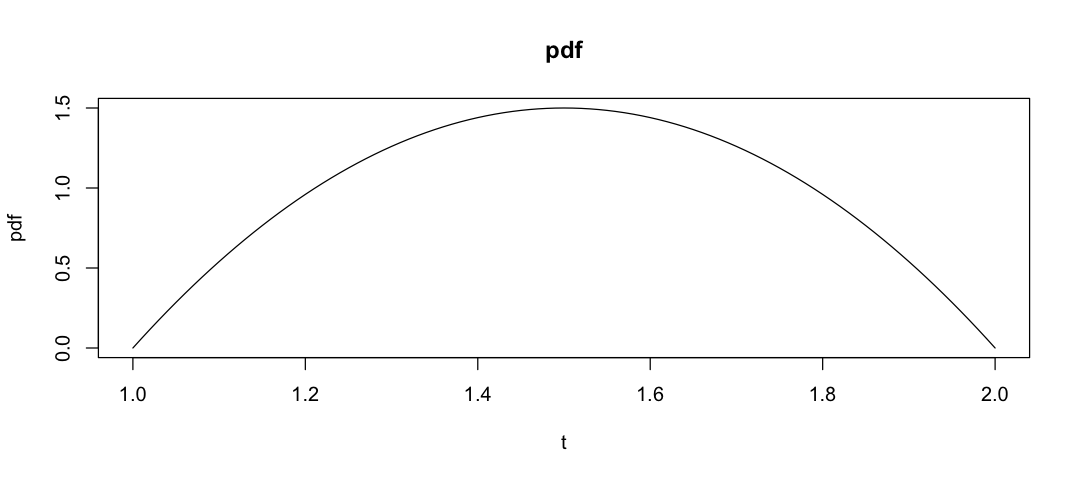

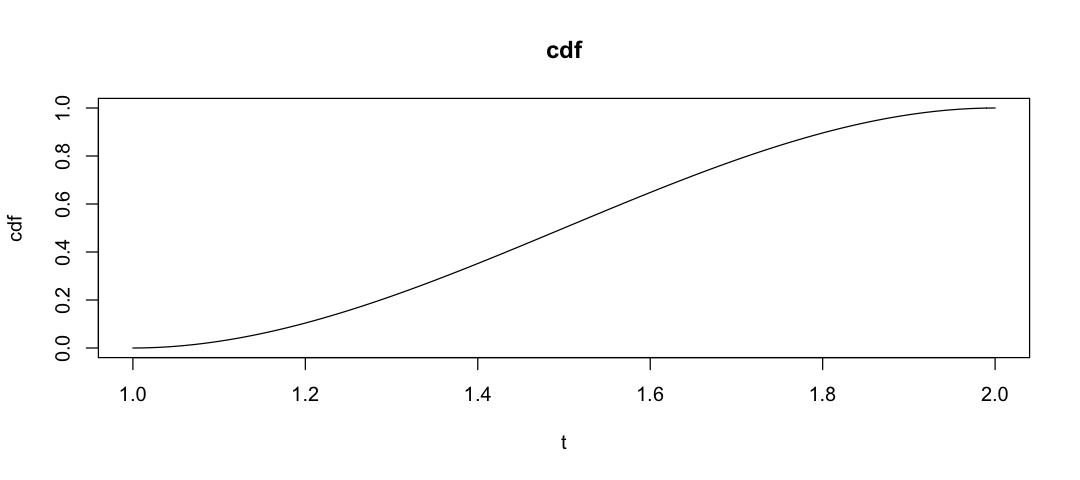

The probability that the student will ﬁnish the aptitude test in more than 75 minutes is: 84.375 % 
The probability that the student will ﬁnish the aptitude test between 90 and 120 minutes is: 50 %

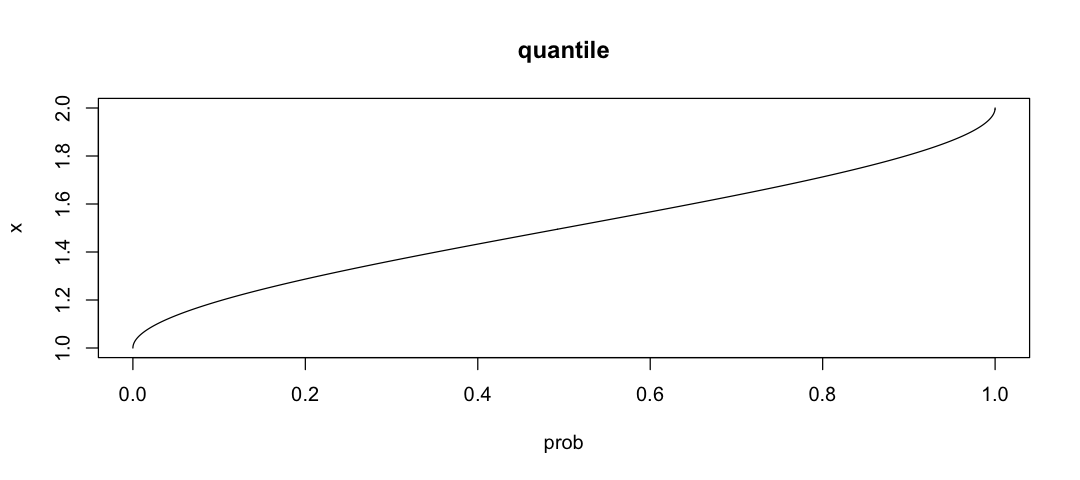

In [6]:
f<-function(t){(t-1)*(2-t)}
func<-function(t){6*(t-1)*(2-t)}
min<-1
max<-2

#A
c<-1/integrate(f,min,max)$value

#pdf
func<-function(t){c*(t-1)*(2-t)}

#B
plot(func,1,2,main='pdf',xlab='t',ylab='pdf')

#cdf
int<-function(t){c*(-(t^3)/3-2*t+(3*t^2)/2+5/6)}
plot(int,1,2,main='cdf',xlab='t',ylab='cdf')

#Quantile
qfunc <- inverse(func,lower=1,upper=2) 
x<-seq(1, 2, 0.005)
y<-int(x)
plot(y,x,main='quantile',type='l',xlab='prob')

#Sampling
rfunc <- function(n,bool=FALSE,seed=111){
        if(bool){ set.seed(seed) }       
        p <- runif(n)
        x <- qfunc(p)   
        return(x)
    }

#C
min<-75/60
p1<-int(min)
min2<-90/60
p2<-int(min2)
cat('The probability that the student will ﬁnish the aptitude test in more than 75 minutes is:',(1-p1)*100,'% \n')
cat('The probability that the student will ﬁnish the aptitude test between 90 and 120 minutes is:',(1-p2)*100,'%')


## Exercise 6

In [7]:
use<-function(x){2*10^4/x^2}

#pdf
func<-function(x){2/x^2}

#cdf
int<-function(x){-2/x+2}


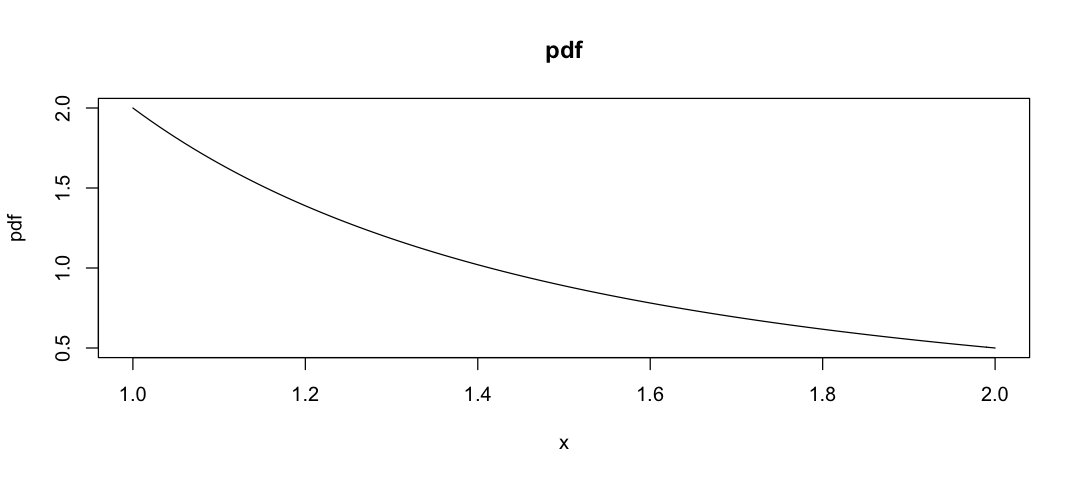

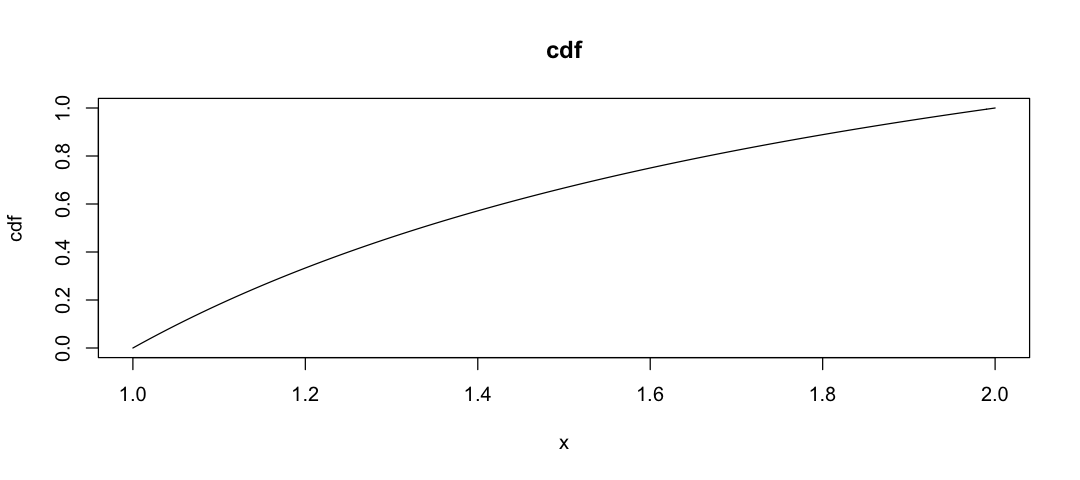

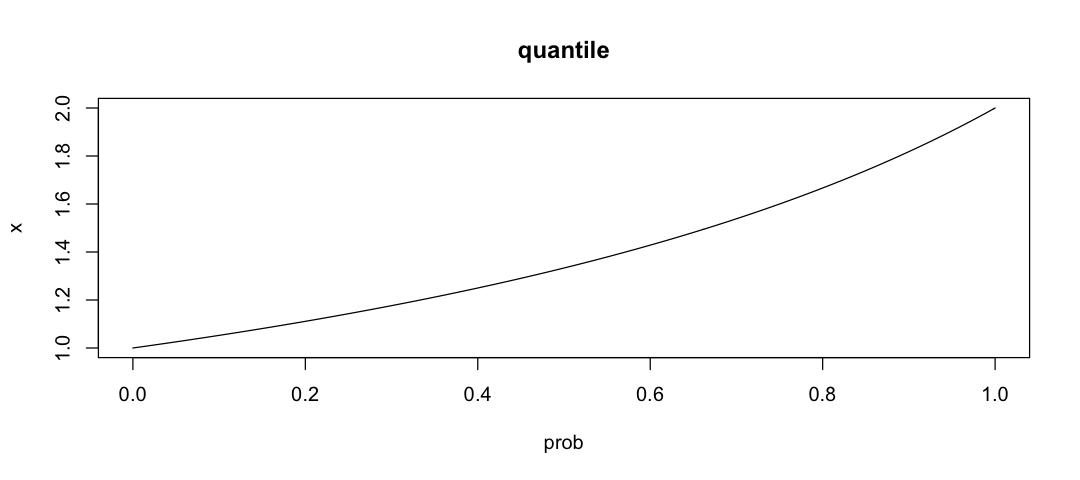

In [8]:
plot(func,1,2,main='pdf',xlab='x',ylab='pdf')
plot(int,1,2,main='cdf',xlab='x',ylab='cdf')

x<-seq(1, 2, 0.005)
y<-int(x)

#Quantile
quant<-inverse(int,lower=1,upper=2)
plot(y,x,main='quantile',type='l',xlab='prob')


#Sampling
rfunc <- function(n,bool=FALSE,seed=111){
        if(bool){ set.seed(seed) }       
        p <- runif(n)
        x <- quant(p)   
        return(x)
    }

In [9]:
n<-15000/10^4
cat('The probability that tires will last less than 15000 km is',int(n)*100,'%')

The probability that tires will last less than 15000 km is 66.66667 %

In [10]:
N=3000
x=seq(1, 2, 1/10000)
samp<-sample(x, N, prob = func(x) , replace = T)
mean<-sum(samp)/N
var<-sum(samp^2)/N-mean^2
cat('Sampling 3000 random variables:\n')
cat('E[x]=',mean,'\t Var(x)=',var)

Sampling 3000 random variables:
E[x]= 1.382108 	 Var(x)= 0.07523412